**Author:** Wafi Wahid


---



**Dataset:** Heart Disease

**Algorithms:**

 1. Logistic Regression
 2. Decision Tree Classifier
 3. KNN
 4. Naive Byes


In [1]:
# prompt: mount the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [29]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

 Read dataset

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Assignment-2/heart.csv'
data = pd.read_csv(file_path)

# Preprocessing

In [5]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0     125.0   212    0        1    168.0      0      1.0      2   
1   53    1   0     140.0   203    1        0    155.0      1      3.1      0   
2   70    1   0     145.0   174    0        1    125.0      1      2.6      0   
3   61    1   0     148.0   203    0        1    161.0      0      0.0      2   
4   62    0   0     138.0   294    1        1    106.0      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [6]:
print("\nData Information:")
data.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1024 non-null   float64
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.2 KB


In [7]:
print("\nData Description:")
print(data.describe())


Data Description:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1024.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611328   246.00000   
std       9.072290     0.460373     1.029641    17.525273    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1024.000000  1025.000000  1024.000000   
mean      0.149268     0.529756   149.140625     0.336585     1.069629   
std       0.356527     0.527878    23.001333     0.472772     1.174079   
min       0.000000     0.00

Checking for duplicates, drop if any

In [8]:
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
data.drop_duplicates(inplace=True)


Number of duplicate rows: 721


Replace '?' with 'NAN' and check missing values

In [9]:
data.replace('?', np.nan, inplace=True)
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64


Drop null values in dataset

In [10]:
data.dropna(inplace=True)
data.shape

(302, 14)

Drop the original independent 'target' column and prepare the target variable

In [11]:
X = data.drop(columns=['target'])
y = data['target']

Splitting dataset into Train and Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (241, 13), Test Set: (61, 13)


Feature Scaling

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (241, 13) (241,)
Test set: (61, 13) (61,)


# Logistic Regression

In [14]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred_logistic = logistic_model.predict(X_test)

In [16]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)


Logistic Regression Results:
Accuracy: 0.8032786885245902
Precision: 0.8101159536185525
Recall: 0.8032786885245902
F1 Score: 0.7982143527028548
Confusion Matrix:
[[17  9]
 [ 3 32]]


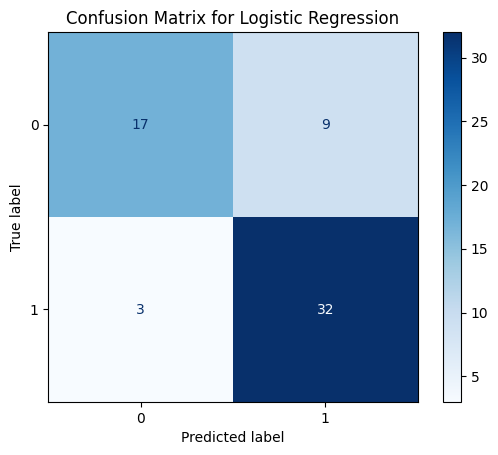

In [17]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1 Score: {f1_logistic}")
print(f"Confusion Matrix:\n{conf_matrix_logistic}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Decision Tree Classifier

In [18]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred_tree = tree_model.predict(X_test)

In [20]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted', zero_division=0)
recall_tree = recall_score(y_test, y_pred_tree, average='weighted', zero_division=0)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted', zero_division=0)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)


Decision Tree Results:
Accuracy: 0.8032786885245902
Precision: 0.8123038956460426
Recall: 0.8032786885245902
F1 Score: 0.8043431977858208
Confusion Matrix:
[[22  4]
 [ 8 27]]


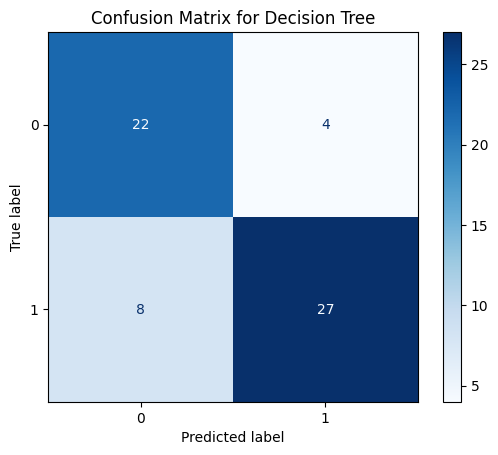

In [21]:
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree}")
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1 Score: {f1_tree}")
print(f"Confusion Matrix:\n{conf_matrix_tree}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# K-Nearest Neighbors (KNN) Model

In [22]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = knn_model.predict(X_test)

In [24]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


K-Nearest Neighbors Results:
Accuracy: 0.8524590163934426
Precision: 0.8538095059459054
Recall: 0.8524590163934426
F1 Score: 0.850974119717503
Confusion Matrix:
[[20  6]
 [ 3 32]]


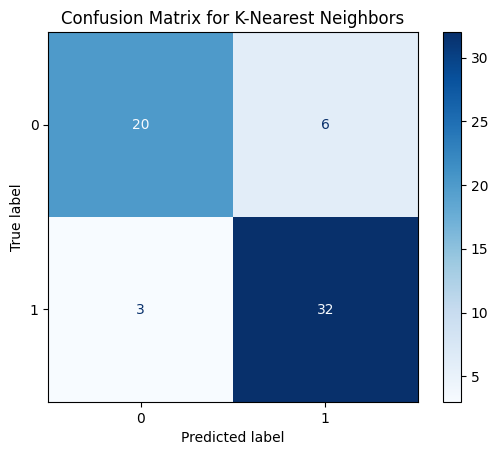

In [25]:
print("\nK-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()

# Naive Bayes Model (MultinomialNB)

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [32]:
y_pred_nb = nb_model.predict(X_test)

In [33]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.8032786885245902
Precision: 0.8048072146432802
Recall: 0.8032786885245902
F1 Score: 0.8003987594151528
Confusion Matrix:
[[18  8]
 [ 4 31]]


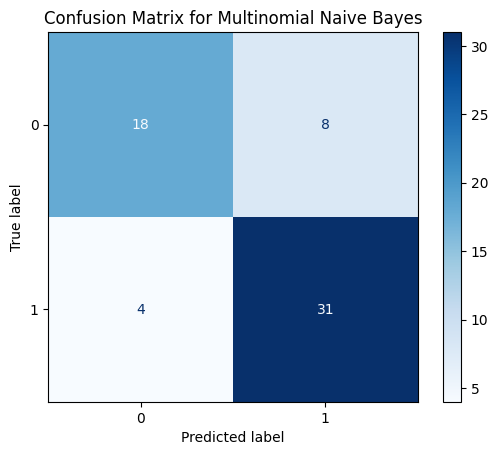

In [34]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap='Blues')
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

# Comparison between models

In [35]:
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes'],
    'Accuracy': [accuracy_logistic, accuracy_tree, accuracy_knn, accuracy_nb],
    'Precision': [precision_logistic, precision_tree, precision_knn, precision_nb],
    'Recall': [recall_logistic, recall_tree, recall_knn, recall_nb],
    'F1 Score': [f1_logistic, f1_tree, f1_knn, f1_nb]
}
results_df = pd.DataFrame(results)
print("\nComparison of Model Metrics:")
print(results_df)


Comparison of Model Metrics:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.803279   0.810116  0.803279  0.798214
1        Decision Tree  0.803279   0.812304  0.803279  0.804343
2                  KNN  0.852459   0.853810  0.852459  0.850974
3          Naive Bayes  0.803279   0.804807  0.803279  0.800399


According to the comparison KNN have highest accuracy and F1 Score. Hence, KNN is the best fit for this dataset.